# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


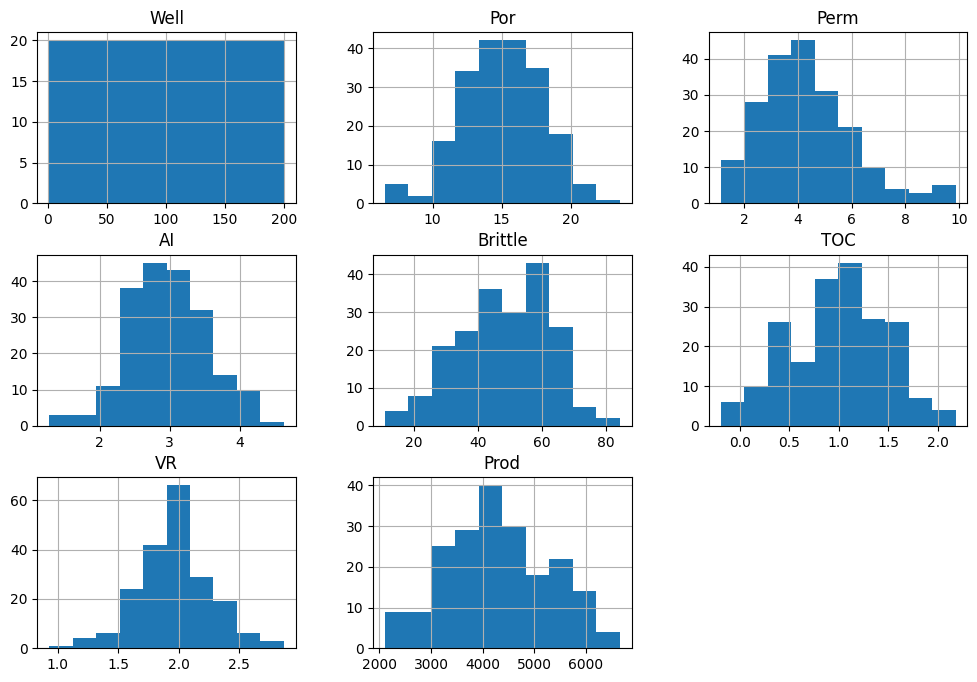

In [3]:
# Ваш код здесь

summary_log = pd.DataFrame(columns= ['Alpha','L1_ratio','Polynomial','MAE_train', 'MAE_test'])

data.hist(figsize=(12,8));

data.describe()


ВЫВОД: Все параметры представлены числовыми признаками, пропуски отсутсвуют, распределение признаков за исключением Well близкое к нормальному, распределение Well равномерное, т.е. для всех скважин колчество наблюдений одинково. 

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг матрицы корреляции = 8
Определитель матрицы корреляции = 0.00073
Определитель матрицы корреляции без целевого признака = 0.00075


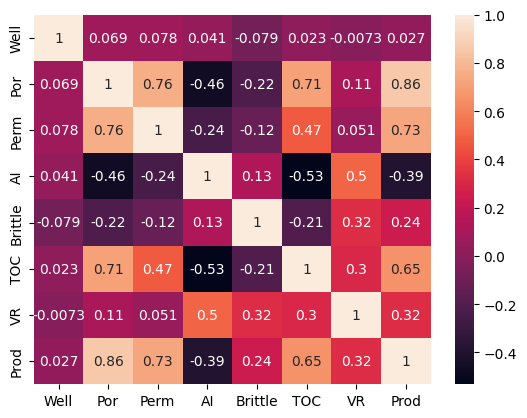

In [4]:
# Ваш код здесь

corr=data.corr()

sns.heatmap(corr, annot = True);

print('Ранг матрицы корреляции =', np.linalg.matrix_rank(corr))
print('Определитель матрицы корреляции = {det:.2}'.format(det=np.linalg.det(corr)))
print('Определитель матрицы корреляции без целевого признака = {det:.2}'.format(det=np.linalg.det(data.drop(['Well'], axis=1).corr())))

> *Ваши выводы здесь*

Мультиколлинеарность достаточно выражена, наибольшую корреляцию с целевой переменной показывают Por (0.85) и Perm(0.73). Полученная матрица корреляции плохо обусловлена, ее определитель близок к нулю, хотя и отличен от нуля. Классическая модель линейной регрессии может столкнуться с проблемами при ограниченной точности вычислений - полученные коэффициенты могут быть очень большими и значительно искаженными.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Ваш код здесь
X = data.drop(['Prod'], axis=1)
y = data['Prod']

# составляем матрицу А 
A = np.column_stack((np.ones(len(data)), X))
print("A=\n",A)

# вычислим OLS-оценку для коэффициентов
W = np.linalg.inv(A.T@A)@A.T@y

feature_names = ['Intercept']+list(X.columns)
W=pd.DataFrame(W,index=feature_names,columns=(['W']))
print('Коэффициенты по OLS \n', W.astype('int').T)

num=np.random.randint(200)
c=A[num]*W.T
print('Predicted random observation Prod =',c.loc['W'].sum().round(0),'; acutal Prod',y[num].round(0))

A=
 [[ 1.000e+00  1.000e+00  1.208e+01 ...  8.140e+01  1.160e+00  2.310e+00]
 [ 1.000e+00  2.000e+00  1.238e+01 ...  4.617e+01  8.900e-01  1.880e+00]
 [ 1.000e+00  3.000e+00  1.402e+01 ...  7.280e+01  8.900e-01  2.720e+00]
 ...
 [ 1.000e+00  1.980e+02  1.212e+01 ...  5.707e+01 -4.000e-02  1.730e+00]
 [ 1.000e+00  1.990e+02  1.555e+01 ...  5.825e+01  1.890e+00  2.350e+00]
 [ 1.000e+00  2.000e+02  2.089e+01 ...  4.617e+01  1.710e+00  2.270e+00]]
Коэффициенты по OLS 
    Intercept  Well  Por  Perm   AI  Brittle  TOC   VR
W      -1232     0  230   116 -365       24  -78  785
Predicted random observation Prod = 5184.0 ; acutal Prod 5086.0


> *Ваши выводы здесь*

Опасения получить неопределенную систему не оправдались, коэффициенты регрессии значимы и находятся в нормальном диапазоне значений. Идентификатор скважины Well, ожидаемо, не оказывает влияния на целевую переменную (коэффициент 0), коэффициенты Brittle и TOC оказывают наименьшее влияние - Well, Brittel и TOC не инморфмативные или малоинформативные, а VR и AI наиболее информативные. По знаку коэффициент мы можем сделать вывод, что чем больше аккустическое сопротивление AI, тем меньше продуктивность скважины.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Ваш код здесь

example={
    'Intercept':[1],
    'Well': [106.0],
    'Por': [15.32],
    'Perm': [3.71],
    'AI': [3.29],
    'Brittle': [55.99],
    'TOC': [1.35],
    'VR': [2.42]
 }
x_example = pd.DataFrame(example)
y_example = 4748.315024
y_pred_example=(x_example@W)['W'][0]

print('Прогноз из примера = {0:.4f}, абсолютная ошибка = {1:0.4f}, отклонение от факта = {2:.2f}%\n'.format(y_pred_example,y_example-y_pred_example, (y_example-y_pred_example)*100/y_example))

# Прогноз для всех скважин

y_pred = (A@W)

def regression_metrics(y_pred,y):
  
  absolute_difference = 0
  n = len(y) # finding total number of items in list
  y_mean = y.mean()
  ss_t = 0
  ss_r = 0

  for i in range (0,n-1):  #looping through each element of the list
    difference = y.iloc[i] - y_pred.iloc[i,0]
    absolute_difference += abs(difference)
    ss_r += difference**2 #The sum of squares of residuals
    ss_t += (y[i]-y_mean)**2 #The total sum of squares (proportional to the variance of the data)

  MAE = absolute_difference/n
  R2_SCORE = 1 - (ss_r/ss_t)

  print ("Mean Absolute Error = {:.4f}".format(MAE))
  print('R2_score = {:4f}'.format(R2_SCORE))

  from sklearn.metrics import r2_score
  print ('R2_score from sklearn = ',round(r2_score(y, y_pred),4))

  return MAE

MAE = regression_metrics(y_pred,y)

# запишем результат
# columns= ['Alpha','L1_ratio','Polynomial','MAE_train', 'MAE_test']

summary_log.loc['МНК'] = ['n/a','n/a',False,MAE,'n/a']

Прогноз из примера = 4723.0641, абсолютная ошибка = 25.2510, отклонение от факта = 0.53%

Mean Absolute Error = 150.7377
R2_score = 0.960434
R2_score from sklearn =  0.9599


> *Ваши выводы здесь*
1) Абсолютная обшибка из заданного примера 25.25 (в миллионах кубических футов в день).

2) Воспользуемся MAE = 0.25 и R2_score = 0.9512, рассчитанного по стандартной формуле. R2_score в пакете sklearn несколько отличается, так как в sklearn используется другой алгоритм расчета.

Мы еще раз убедились, что полученная модель линейной регрессии определена и достаточно хорошо описывает поведение целевой переменной в массиве наблюдений. На это указывает невысокое значение абсолютной ошибки и близкий к единице коэффициент R2_score, который можно интерпретировать таким образом, что более 95% наблюдений хорошо объясняются полученной моделью.


### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [7]:
# Ваш код здесь

for i in list(X.columns):
    if np.sign(corr[i]['Prod'])!= np.sign(W.loc[i]['W']): print("Знак коэффициент корреляции '{0}'={1:.0} не совпадает со знаком коэффициента регрессии {2:.1f}".format(
        i,corr[i]['Prod'], W.loc[i]['W']))



Знак коэффициент корреляции 'TOC'=0.7 не совпадает со знаком коэффициента регрессии -78.4


> *Ваши выводы здесь*

TOC имеет положительную корреляцию с целевой переменной, однако коэффициент регрессии отрицательный. Вероятно, это связано с масштабом признаков и влиянием Intercept.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [8]:
# Ваш код здесь

# Найдем пары с взаимной корреляцией большое 0.7
for i in range(0,len(corr)-1):
    for j in range(i+1,len(corr)-1):
        if corr.iloc[i,j]>0.7:
            print("corr({i},{j})={coef:.2f}; corr({i},'Prod')={ip:.2f},corr({j},'Prod')={jp:.2f}".format(coef=corr.iloc[i,j], i=corr.index[i], j=corr.index[j],ip=corr.iloc[i]['Prod'],jp=corr.iloc[j]['Prod']))

# признаки для удаления

excluded_columns = ['Perm','TOC','Well','Prod']

print('Факторы для удаления', excluded_columns)

X_ex = data.drop(excluded_columns, axis=1)
y = data['Prod']

# составляем матрицу А 
A_ex = np.column_stack((np.ones(len(data)), X_ex))

#print("A=\n",A_ex)

# вычислим OLS-оценку для коэффициентов
W_ex = np.linalg.inv(A_ex.T@A_ex)@A_ex.T@y

ex_feature_names = ['Intercept']+list(X_ex.columns)
W_ex=pd.DataFrame(W_ex,index=ex_feature_names,columns=(['W_ex']))
print('Коэффициенты по OLS \n', W_ex.astype('int').T)

# рассчитываем целевую переменную по полученной модели
y_pred_ex = (A_ex@W_ex)

# метрики полученной регрессии
MAE = regression_metrics(y_pred_ex,y)

# запишем результат
# columns= ['Alpha','L1_ratio','Polynomial','MAE_train', 'MAE_test']

summary_log.loc['МНК без корр. колонок'] = ['n/a','n/a',False,MAE,'n/a']

corr(Por,Perm)=0.76; corr(Por,'Prod')=0.86,corr(Perm,'Prod')=0.73
corr(Por,TOC)=0.71; corr(Por,'Prod')=0.86,corr(TOC,'Prod')=0.65
Факторы для удаления ['Perm', 'TOC', 'Well', 'Prod']
Коэффициенты по OLS 
       Intercept  Por   AI  Brittle   VR
W_ex      -1835  293 -200       27  517
Mean Absolute Error = 168.5717
R2_score = 0.945327
R2_score from sklearn =  0.9452


> *Ваши выводы здесь*

Мы видим, что хотя метрики несколько ухудшились: абсолютная ошибка немного увеличилась и R2_score уменшился, но модель по-прежнему хорошо описывает выборку. Значения коэффициентов регрессии ожидаемо изменились но остались в том же диапазоне и с тем же знаком. Фактор TOC, который демонстрировал разнонаправленные коэффициенты в матрице корреляции и уравнении регрессии, был исключен из уравнения, поэтому мы не можем сказать, изменился ли знак его коэффициента.


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [9]:
from sklearn.linear_model import LinearRegression

lr_ex = LinearRegression()

lr_ex.fit(X_ex,y)
y_pred_lr= pd.DataFrame(lr_ex.predict(X_ex))

W_lr=np.concatenate([[lr_ex.intercept_],lr_ex.coef_])

Names_lr = np.concatenate([['Intercept'],lr_ex.feature_names_in_])
W_lr = pd.DataFrame(W_lr, index=Names_lr, columns = ['W_lr'])

print('Матрица коэффициентов полученных вручную:\n',W_ex.T)
print('Матрица коэффициентов sklearn:\n',W_lr.T.astype('int'))

MAE = regression_metrics(y_pred_lr,y)

summary_log.loc['Библиотечная LR'] = ['n/a','n/a',False,MAE,'n/a']

Матрица коэффициентов полученных вручную:
         Intercept         Por          AI    Brittle          VR
W_ex -1835.446461  293.036246 -200.030912  27.640982  517.402726
Матрица коэффициентов sklearn:
       Intercept  Por   AI  Brittle   VR
W_lr      -1835  293 -200       27  517
Mean Absolute Error = 168.5717
R2_score = 0.945327
R2_score from sklearn =  0.9452


> *Ваши выводы здесь*

Результаты, полученные при помощи sklearn и вручную совпадают.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [11]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error

#Создаем объект для min-max нормализации
scaler = StandardScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_ex)
#Производим преобразование для каждой из выборок
X_scaled = scaler.transform(X_ex)

#Создаем объект для генерации полиномиальных признаков степени 3
poly = PolynomialFeatures(degree=3, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_scaled)
#Производим преобразование
X_scaled_poly = poly.transform(X_scaled)

poly_feature_names = poly.get_feature_names_out()

print('Sample shape: {0}, \nPolinomial feature names:{1}'.format(X_scaled_poly.shape,poly_feature_names))

# Рассчитываем параметры целевой переменной для полиномиальной модели

lr_poly = LinearRegression()
lr_poly.fit(X_scaled_poly,y)

y_pred_poly = lr_poly.predict(X_scaled_poly)

# Получаем метрики  модели

res = cross_validate(lr_poly,X_scaled_poly,y,scoring=['neg_mean_absolute_error','r2'],cv=5,return_train_score=True)

print('\nТренинговые фолды: Среднее значение MAE = {0:.0f}, Среднее значение r2_score = {1:.4f}\
      \nТестовые фолды: Среднее значение MAE = {2:.0f}, Среднее значение r2_score = {3:.4f}'.format(
    -res['train_neg_mean_absolute_error'].mean(),res['train_r2'].mean(),
    -res['test_neg_mean_absolute_error'].mean(),res['test_r2'].mean()
    ) )

summary_log.loc['LR Scaled Poly'] = ['n/a','n/a',True,-res['train_neg_mean_absolute_error'].mean(),
                                     -res['test_neg_mean_absolute_error'].mean()]

Sample shape: (200, 34), 
Polinomial feature names:['x0' 'x1' 'x2' 'x3' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x1^2' 'x1 x2' 'x1 x3'
 'x2^2' 'x2 x3' 'x3^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x2^2' 'x0 x2 x3' 'x0 x3^2' 'x1^3' 'x1^2 x2'
 'x1^2 x3' 'x1 x2^2' 'x1 x2 x3' 'x1 x3^2' 'x2^3' 'x2^2 x3' 'x2 x3^2'
 'x3^3']

Тренинговые фолды: Среднее значение MAE = 75, Среднее значение r2_score = 0.9896      
Тестовые фолды: Среднее значение MAE = 110, Среднее значение r2_score = 0.9748


> *Ваши выводы здесь*

Модель полиномиальной регрессии третьей степени на стандартизованных данных обладает значительно лучшей предсказательной способностью по сравнению с моделью первой степени без нормализации: метрика ошибки уменьшилась и коэффициент детерминации увеличился. Тем не менее появились признаки переобучения модели - ошибка тестовых фолдов почти в полтора раза выше ошибки тренинговых фолдов. 

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

100%|██████████| 50/50 [00:00<00:00, 125.63trial/s, best loss: 95.67500530497017]
Наилучшие значения гиперпараметров {'alpha': 4.800000000000001}

Alpha = 4.8000, Тренинговые фолды: Среднее значение MAE = 78.1492,      
Тестовые фолды: Среднее значение MAE = 95.6750


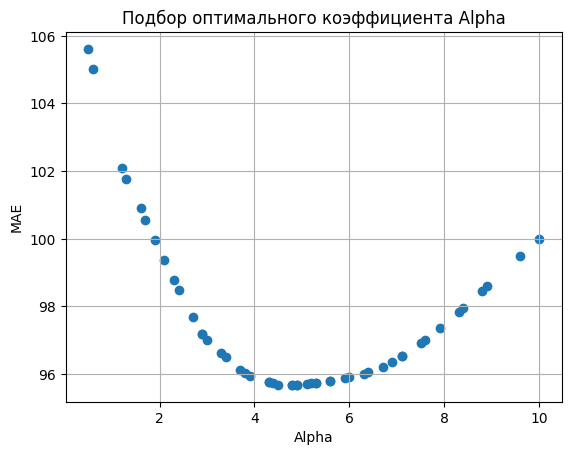

In [12]:
# Ваш код здесь
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def hyperopt_lasso(params,X=X_scaled_poly, y=y):
    # функция получает комбинацию гиперпараметров в "params"
    
    params = {'alpha':params['alpha']}

    # используем эту комбинацию для построения модели
    model = Lasso(**params)
    
    score = cross_validate(model,X,y,scoring=['neg_mean_absolute_error','r2'],cv=5,return_train_score=True)['test_neg_mean_absolute_error'].mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов
space={'alpha':hp.quniform('alpha', 0.5, 10.0,0.1)}

best=fmin(hyperopt_lasso, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials # логирование результатов
         )
print("Наилучшие значения гиперпараметров {}".format(best))



#Инициализируем объект класса линейная регрессия с L1-регуляризацией для лучшего параметра
lasso_lr_poly = Lasso(alpha=best['alpha'])
  
#Обучаем модель 
lasso_lr_poly.fit(X_scaled_poly, y)
#Предсказываем целевую 
y_pred = lasso_lr_poly.predict(X_scaled_poly)

#Выводим результирующие метрики

res = cross_validate(lasso_lr_poly,X_scaled_poly,y,scoring=['neg_mean_absolute_error','r2'],cv=5,return_train_score=True)

print('\nAlpha = {2:.4f}, Тренинговые фолды: Среднее значение MAE = {0:.4f},\
      \nТестовые фолды: Среднее значение MAE = {1:.4f}'.format(
    -res['train_neg_mean_absolute_error'].mean(),
    -res['test_neg_mean_absolute_error'].mean(),
    best['alpha']
    ) )

plt.scatter(trials.idxs_vals[1]['alpha'], trials.losses())
plt.title("Подбор оптимального коэффициента Alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.grid()
plt.show()

summary_log.loc['Lasso hyperopt'] = [best['alpha'],'n/a',True,-res['train_neg_mean_absolute_error'].mean(),
                                     -res['test_neg_mean_absolute_error'].mean()]

> *Ваши выводы здесь*

Введение штрафа (коэффициент регуляризации Alpha) увеличил смещение - мы видим большую ошибку MAE на тренинговом наборе, однако предсказательная способность модели улучшилась: MAE на тестовом наборе в модели с регуляризацией значительно лучше чем без. Оптимальное значение Alpha находится в окрестности 4.7. 

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

100%|██████████| 50/50 [00:00<00:00, 151.64trial/s, best loss: 110.069422790407]  
Наилучшие значения гиперпараметров {'alpha': 0.2}

Alpha = 0.2000, Тренинговые фолды: Среднее значение MAE = 75.4033,      
Тестовые фолды: Среднее значение MAE = 110.0694


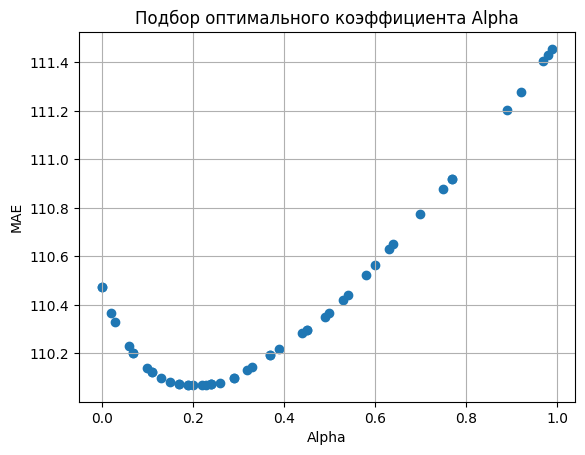

In [13]:
# Ваш код здесь
from sklearn.linear_model import Ridge
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import sys 
import warnings
import os

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

def hyperopt_Ridge(params,X=X_scaled_poly, y=y):
    # функция получает комбинацию гиперпараметров в "params"
    
    params = {'alpha':params['alpha']}

    # используем эту комбинацию для построения модели
    model = Ridge(**params)
    
    score = cross_validate(model,X,y,scoring=['neg_mean_absolute_error','r2'],cv=5,return_train_score=True)['test_neg_mean_absolute_error'].mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score


# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов
space={'alpha':hp.quniform('alpha', 0, 1,0.01)}

best=fmin(hyperopt_Ridge, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials # логирование результатов
         )
print("Наилучшие значения гиперпараметров {}".format(best))



#Инициализируем объект класса линейная регрессия с L1-регуляризацией для лучшего параметра
ridge_lr_poly = Ridge(alpha=best['alpha'])
  
#Обучаем модель 
ridge_lr_poly.fit(X_scaled_poly, y)
#Предсказываем целевую 
y_pred = ridge_lr_poly.predict(X_scaled_poly)

#Выводим результирующие метрики

res = cross_validate(ridge_lr_poly,X_scaled_poly,y,scoring=['neg_mean_absolute_error','r2'],cv=5,return_train_score=True)

print('\nAlpha = {2:.4f}, Тренинговые фолды: Среднее значение MAE = {0:.4f},\
      \nТестовые фолды: Среднее значение MAE = {1:.4f}'.format(
    -res['train_neg_mean_absolute_error'].mean(),
    -res['test_neg_mean_absolute_error'].mean(),
    best['alpha']
    ) )

plt.scatter(trials.idxs_vals[1]['alpha'], trials.losses())
plt.title("Подбор оптимального коэффициента Alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.grid()
plt.show()

summary_log.loc['Ridge hyperopt'] = [best['alpha'],'n/a',True,-res['train_neg_mean_absolute_error'].mean(),
                                     -res['test_neg_mean_absolute_error'].mean()]


> *Ваши выводы здесь*

Ridge модель показала результаты хуже чем Lasso. По-видимому, этот алгоритм не позволил в достаточной степени снизить влияние мультиколлениарных факторов и модель осталась значительно переобученной

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
# Ваш код здесь
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def hyperopt_ElasticNet(params,X=X_scaled_poly, y=y):
    # функция получает комбинацию гиперпараметров в "params"
    
    params = {'alpha':params['alpha'],
              'l1_ratio':params['l1_ratio']}

    # используем эту комбинацию для построения модели
    model = ElasticNet(**params)
    
    score = cross_validate(model,X,y,scoring=['neg_mean_absolute_error','r2'],cv=5,return_train_score=True)['test_neg_mean_absolute_error'].mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score


# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов
space={
    'alpha':hp.quniform('alpha', 0.0001, 100,0.0001),
#     "alpha": hp.choice('alpha', [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]),
       'l1_ratio':hp.quniform('l1_ratio',0.01,1,0.005)
       }

best=fmin(hyperopt_ElasticNet, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=200, # максимальное количество итераций
          trials=trials # логирование результатов
         )
print("Наилучшие значения гиперпараметров {}".format(best))



#Инициализируем объект класса линейная регрессия с L1-регуляризацией для лучшего параметра
ElasticNet_poly = ElasticNet(alpha = best['alpha'], l1_ratio = best['l1_ratio'] )
  
#Обучаем модель 
ElasticNet_poly.fit(X_scaled_poly, y)
#Предсказываем целевую 
y_pred = ElasticNet_poly.predict(X_scaled_poly)

#Выводим результирующие метрики

res = cross_validate(ElasticNet_poly,X_scaled_poly,y,scoring=['neg_mean_absolute_error','r2','neg_mean_absolute_percentage_error'],cv=5,return_train_score=True)

print('\nAlpha = {2:.4f}, Тренинговые фолды: Среднее значение MAE = {0:.4f},\
      \nТестовые фолды: Среднее значение MAE = {1:.4f}, MAPE = {3:.4f}'.format(
    -res['train_neg_mean_absolute_error'].mean(),
    -res['test_neg_mean_absolute_error'].mean(),
    best['alpha'],
    -res['test_neg_mean_absolute_percentage_error'].mean()
    ) )

df = pd.DataFrame(np.column_stack([trials.idxs_vals[1]['alpha'],trials.idxs_vals[1]['l1_ratio'],trials.losses()]),
                  columns=['alpha','l1_ratio','score'])

import plotly.express as px

fig = px.scatter_3d(df, x='alpha', y='l1_ratio', z='score');
fig.show();

summary_log.loc['ElsasticNet'] = [best['alpha'],best['l1_ratio'],True,-res['train_neg_mean_absolute_error'].mean(),
                                     -res['test_neg_mean_absolute_error'].mean()]



100%|██████████| 200/200 [00:02<00:00, 86.07trial/s, best loss: 95.76748550324405] 
Наилучшие значения гиперпараметров {'alpha': 5.4725, 'l1_ratio': 1.0}

Alpha = 5.4725, Тренинговые фолды: Среднее значение MAE = 78.6977,      
Тестовые фолды: Среднее значение MAE = 95.7675, MAPE = 0.0228


> *Ваши выводы здесь*

Мы видим, что лучший результат оптимизации дает l1_ratio = 1. Это указывает на то, ElasticNet в нашем случае не эффективен и лучший результат достигается при Lasso регуляризации. 

Прим: Для сравнения моделей мы использовали MAE, но так как в задании указан MAPE, этот критерий также приведен в выдаче

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

In [15]:
# Ваш код здесь

summary_log

,Alpha,L1_ratio,Polynomial,MAE_train,MAE_test
МНК,n/a,n/a,False,150.737745,n/a
МНК без корр. колонок,n/a,n/a,False,168.571695,n/a
Библиотечная LR,n/a,n/a,False,168.571695,n/a
LR Scaled Poly,n/a,n/a,True,75.345310,110.473609
Lasso hyperopt,4.8,n/a,True,78.149226,95.675005
Ridge hyperopt,0.2,n/a,True,75.403257,110.069423
ElsasticNet,5.4725,1.0,True,78.697670,95.767486


> *Ваши выводы здесь*

Полиномиальная регрессия OLS и следом за ней Ridge с небольшим штрафом наилучшим образом отразили представленные данные, при этом показали плохую предсказательную способность. Лучшую предсказательную способность демострирует Lasso с коэффициентом регуляризации 4.6. Все модели имеют признаки переобучения.